# Sum Product Algorithm

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 7

Setting up the environment

In [0]:
import numpy as np

%install_ext https://sml.forge.nicta.com.au/isml15/data/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [1]:
%load_ext tikzmagic

The aim of this exercise is to implement the sum product algorithm on a chain graph.

## Distributive law

The [distributive property](http://en.wikipedia.org/wiki/Distributive_property) can be used to save computation, and is the basis of message passing and dynamic programming. See an [anecdote](http://bibiserv.techfak.uni-bielefeld.de/dynprog/node3_mn.html) about camels.

Consider the following equation:
$$
2*3 + 2*5 = 2 * (3+5)
$$

* How many mathematical operations (multiplications and additions) are on the left hand side?
* How many mathematical operations are on the right hand side?

Construct a larger example where there is even more computational savings.

### Solution

* LHS has 2 multiplies and 1 addition
* RHS has 1 multiply and 1 addition

## Message passing

Consider the following factor graph.

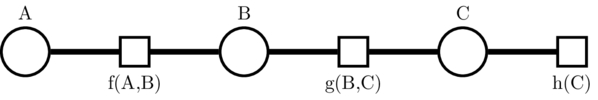

In [2]:
%%tikz --scale 2 --size 700,100 -f jpg
\tikzstyle{rv}=[circle, draw=black, fill=white, line width=0.5mm, minimum size=25pt, inner sep=0pt]
\tikzstyle{factor}=[rectangle, draw=black, fill=white, line width=0.5mm, minimum size=15pt, inner sep=0pt]
\tikzstyle{edge} = [draw, line width=1mm]

\node[rv,label=above:{A}] (a) at (0,0) {};
\node[rv,label=above:{B}] (b) at (2,0) {};
\node[rv,label=above:{C}] (c) at (4,0) {};

\node[factor,label=below:{f(A,B)}] (f) at (1,0) {};
\node[factor,label=below:{g(B,C)}] (g) at (3,0) {};
\node[factor,label=below:{h(C)}] (h) at (5,0) {};

\foreach \source/ \dest in {a/f, f/b, b/g, g/c, c/h}
        \path[edge] (\source) -- (\dest);

The factors are given by the following tables:

|f(A,B)  | A=$\square$ | A=$\bigcirc$ | A = $\clubsuit$ | A = $\heartsuit$ | A = $\triangle$ |
|--|:--:|:--:|:--:|:--:|:--:|
|**B**=$p$|0.01|0.01|0.12|0.01|0.14|
|**B**=$q$|0.03|0.15|0.01|0.01|0.01|
|**B**=$r$|0.13|0.11|0.07|0.18|0.01|

|g(B,C) | B=$p$ | B=$q$ | B=$r$ |
|--|:--:|:--:|:--:|
|**C**=$w$|0.05|0.06|0.07|
|**C**=$x$|0.1|0.3|0.2|
|**C**=$y$|0.03|0.02|0.1|
|**C**=$z$|0.11|0.15|0.08|

|  | h(C) |
|--|:--:|
|**C**=$w$|1.2|
|**C**=$x$|3.2|
|**C**=$y$|1.8|
|**C**=$z$|2.3|

Using the sum product algorithm, compute the marginal distribution of the random variable $B$.

*Hint: Note that the factors are not normalised.*

### Solution

**See Section 8.4.4 of Bishop for the general algorithm.**

#### Forward direction (left to right)

The message from variable node A
$\mu_{A\to f(A,B)} = 1$

The message from factor f(A,B)
\begin{align*}
\mu_{f(A,B) \to B} &= \sum_{A} f(A,B)\\
&=
\begin{bmatrix}
0.29\\
0.21\\
0.5\\
\end{bmatrix}
\end{align*}

#### Reverse direction (right to left)
The message from factor node h(C)
$\mu_{h(C) \to C} = h(C)$

The message from variable node C
$\mu_{C \to g(B,C)} = \mu_{h(C) \to C} = h(C)$

The message from factor node g(B,C)
\begin{align*}
\mu_{g(B,C) \to B} &= \sum_{C} g(B,C) h(C)\\
&=
\begin{bmatrix}
0.687\\
1.413\\
1.088\\
\end{bmatrix}
\end{align*}

#### The marginal p(B)

\begin{align*}
\tilde{p}(B) &= \mu_{f(A,B) \to B} \mu_{g(B,C) \to B}\\
&=
\begin{bmatrix}
0.19923\\
0.29673\\
0.544\\
\end{bmatrix}
\end{align*}

$$p(B) = \frac{\tilde{p}(B)}{1.03996} = 
\begin{bmatrix}
0.192\\
0.285\\
0.523\\
\end{bmatrix}
$$

In [3]:
# Solution

print(0.05*1.2 + 0.1*3.2 + 0.03*1.8 + 0.11*2.3)
print(0.06*1.2 + 0.3*3.2 + 0.02*1.8 + 0.15*2.3)
print(0.07*1.2 + 0.2*3.2 + 0.1*1.8 + 0.08*2.3)

print(0.687*0.29)
print(1.413*0.21)
print(1.088*0.5)

print(0.19923+0.29673+0.544)

print(np.array([0.19923,0.29673,0.544])/1.03996)


0.687
1.413
1.088
0.19923
0.29673
0.544
1.03996
[ 0.19157468  0.28532828  0.52309704]
